In [1]:
from GA import solve
from TSP import compute_distance_matrix, visualize
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [50]:

file_path = '../data/2_SouthEast.csv'

In [64]:
locations = pd.read_csv(file_path, header=None).values
locations


array([['province', 'lat', 'lon'],
       ['Hồ Chí Minh', '10.7763897', '106.7011391'],
       ['Tây Ninh', '11.4019366', '106.1626927'],
       ['Bình Phước', '11.7543232', '106.9266473'],
       ['Bình Dương', '11.1836551', '106.7031737'],
       ['Đồng Nai', '11.0355624', '107.1881076'],
       ['Vũng Tàu', '10.3486485', '107.0765028']], dtype=object)

In [52]:
locations_numeric = locations[1:, 1:].astype(float)

distance_matrix = compute_distance_matrix(locations_numeric)

In [53]:

best_distance, best_route, fitness_history = solve(
    distance_matrix,
    population_size=100,
    generations=200,
    mutation_rate=0.02,
    mutation_algorithm='inversion',
    crossover_algorithm='order',
    selection_algorithm='tournament'
)


In [54]:

# In kết quả
print("Best route:", best_route)
print("Total distance (km):", best_distance)


Best route: [1, 6, 5, 3, 2, 4, 1]
Total distance (km): 426.0223379827621


### Ảnh hưởng của Population size

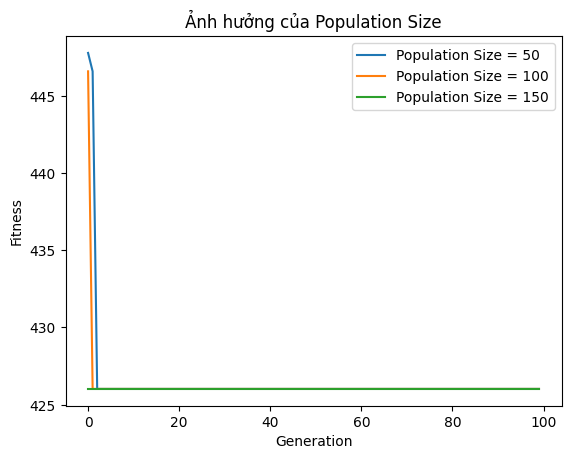

In [76]:
_, _, fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=50)
_, _, fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=100)
_, _, fitness3 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=150)

plt.plot(fitness1, label='Population Size = 50')
plt.plot(fitness2, label='Population Size = 100')
plt.plot(fitness3, label='Population Size = 150')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Ảnh hưởng của Population Size")
plt.legend()
plt.show()


In [74]:
import pandas as pd
pd.DataFrame({
    'gen_1': fitness1,
    'gen_2': fitness2,
    'gen_3': fitness3
}).to_csv('fitness.csv', index=False)

In [77]:
print(fitness1[:5])


[np.float64(447.7726760945462), np.float64(446.58067224997563), np.float64(426.02233798276217), np.float64(426.02233798276217), np.float64(426.02233798276217)]


### Đánh giá kết quả:

## Ảnh hưởng của generations

### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và population_size

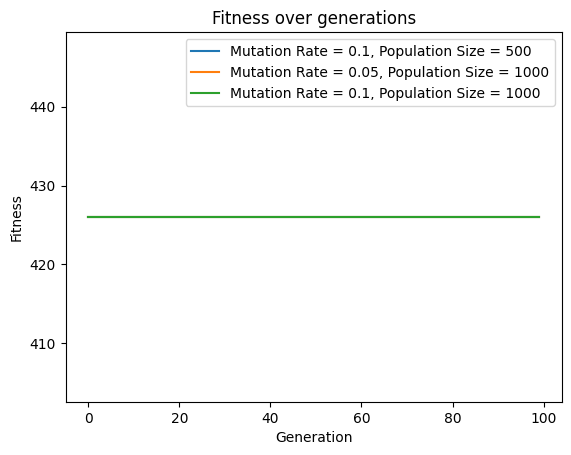

In [79]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.1, population_size=500)[2]
fitness2 = solve(distance_matrix, generations=100, mutation_rate=0.05, population_size=1000)[2]
fitness3 = solve(distance_matrix, generations=100, mutation_rate=0.1, population_size=1000)[2]

plt.plot(fitness1, label='Mutation Rate = 0.1, Population Size = 500')
plt.plot(fitness2, label='Mutation Rate = 0.05, Population Size = 1000')
plt.plot(fitness3, label='Mutation Rate = 0.1, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()


### Đánh giá kết quả:

## Tăng đồng thời mutation_rate và generations

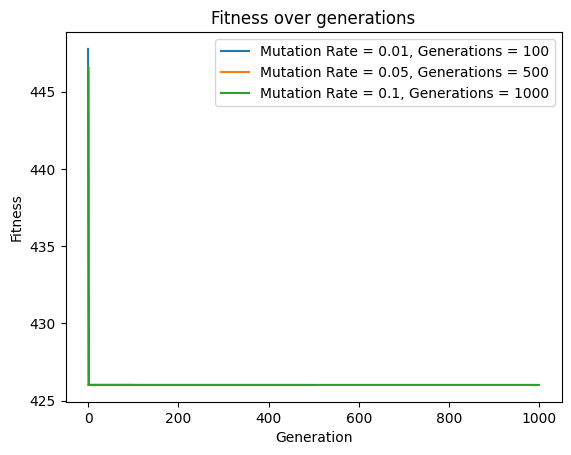

In [ ]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.05, population_size=100)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.1, population_size=100)[2]
plt.plot(fitness1, label='Mutation Rate = 0.01, Generations = 100')
plt.plot(fitness2, label='Mutation Rate = 0.05, Generations = 500')
plt.plot(fitness3, label='Mutation Rate = 0.1, Generations = 1000') 
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()


### Đánh giá kết quả:

## Tăng đồng thời generations và population_size

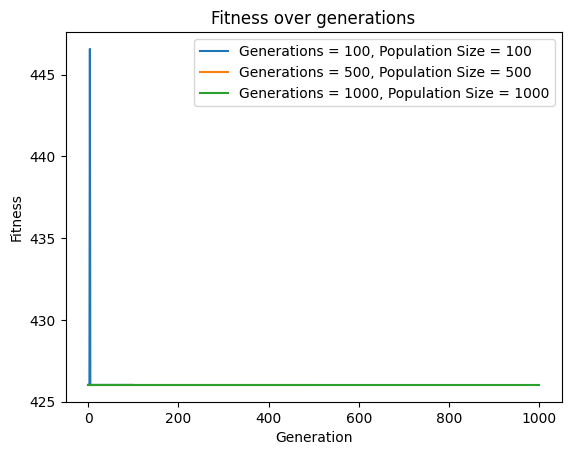

In [ ]:
fitness1 = solve(distance_matrix, generations=100, mutation_rate=0.01, population_size=100)[2]
fitness2 = solve(distance_matrix, generations=500, mutation_rate=0.01, population_size=500)[2]
fitness3 = solve(distance_matrix, generations=1000, mutation_rate=0.01, population_size=1000)[2]
plt.plot(fitness1, label='Generations = 100, Population Size = 100')
plt.plot(fitness2, label='Generations = 500, Population Size = 500')
plt.plot(fitness3, label='Generations = 1000, Population Size = 1000')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness over generations")
plt.legend()
plt.show()


### Đánh giá kết quả:

## KẾT LUẬN